In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [207]:
#uploaded csv file
loan_dataset = pd.read_csv('/content/train_loan.csv')

In [208]:
#data verification
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [209]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [210]:
#Null check
loan_dataset.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#Missing value handling

In [211]:
loan_dataset['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [212]:
loan_dataset['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [213]:
# Gender Mode Calculation
loan_dataset['Gender'] = loan_dataset['Gender'].fillna('Male')

In [214]:
loan_dataset['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [215]:
# Married Mode Calculation
loan_dataset['Married'].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [216]:
loan_dataset['Married'] = loan_dataset['Married'].fillna('Yes')

In [217]:
loan_dataset.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [218]:
# Self_Employed Mode Calculation
loan_dataset['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [219]:
loan_dataset['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [220]:
loan_dataset['Self_Employed'] = loan_dataset['Self_Employed'].fillna('No')

In [221]:
loan_dataset['Credit_History'].unique()

array([ 1.,  0., nan])

In [222]:
loan_dataset['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [223]:
# Fill Credit_History with mode and convert to number(float)
loan_dataset['Credit_History'] = loan_dataset['Credit_History'].fillna(1.0)

In [224]:
loan_dataset['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [225]:
loan_dataset['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [226]:
# Mode for Dependents
loan_dataset.Dependents = loan_dataset.Dependents.fillna('0')

In [227]:
#Removed the + symbol for converting to int data type
loan_dataset['Dependents'] = loan_dataset['Dependents'].str.replace("+", "")

In [228]:
# Converting to int data type
loan_dataset['Dependents'] = loan_dataset['Dependents'].astype('int')

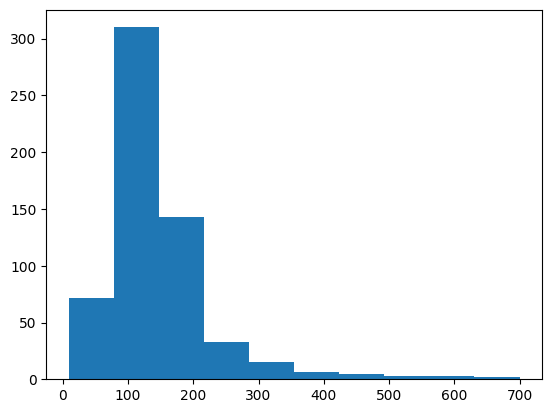

In [229]:
plt.hist(loan_dataset.LoanAmount)
plt.show()

In [230]:
#median calculation for loan Amount
loan_median = loan_dataset.LoanAmount.median()
loan_median

128.0

In [231]:
loan_dataset.LoanAmount = loan_dataset.LoanAmount.fillna(loan_median)

In [232]:
loan_dataset.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

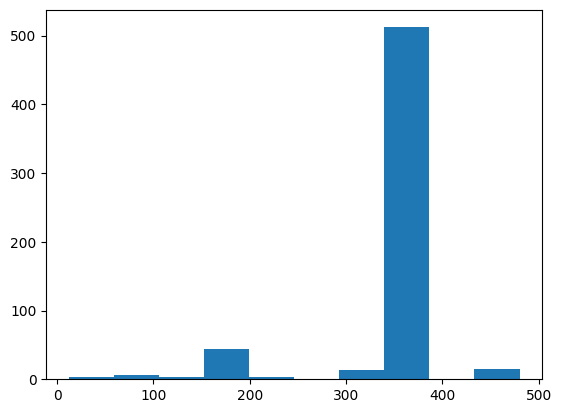

In [233]:
plt.hist(loan_dataset.Loan_Amount_Term)
plt.show()

In [234]:
#Median Calculation
loan_term = loan_dataset.Loan_Amount_Term.median()
loan_term

360.0

In [235]:
loan_dataset.Loan_Amount_Term = loan_dataset.Loan_Amount_Term.fillna(loan_term)

In [236]:
#Completed all the Missing values
loan_dataset.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [237]:
loan_dataset.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents             int64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

## Outlier detection

In [238]:
# ApplicantIncome, CoapplicantIncome, LoanAmount are the columns that we need to check for outliers

# But all the columns are personal info.
# So Outlier detection is not a mandatory for this DataSet


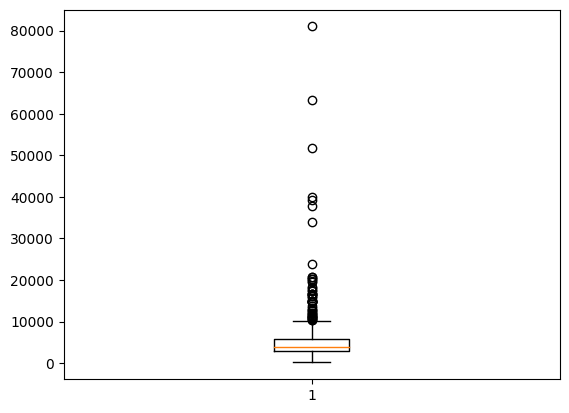

In [239]:
# boxplot Graph for ApplicantIncome, CoapplicantIncome, LoanAmount
plt.boxplot(loan_dataset.ApplicantIncome)
plt.show()

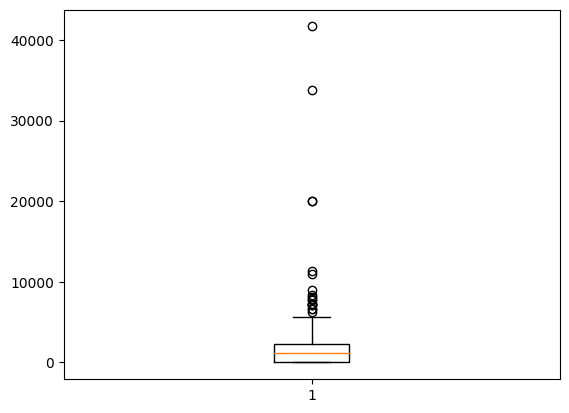

In [240]:
# boxplot Graph for CoapplicantIncome
plt.boxplot(loan_dataset.CoapplicantIncome)
plt.show()

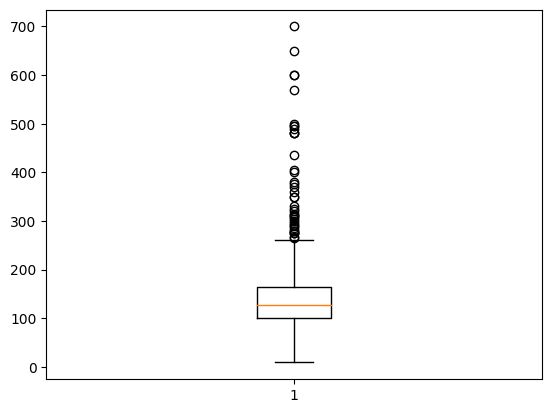

In [241]:
# boxplot Graph for LoanAmount
plt.boxplot(loan_dataset.LoanAmount)
plt.show()

In [242]:
# Trimming Outlier for LoanAmount
q1 = loan_dataset['LoanAmount'].quantile(0.25)
q3 = loan_dataset['LoanAmount'].quantile(0.75)
iqr = q3 -q1
iqr

64.5

In [243]:
upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr
print(upper_limit,lower_limit)

261.5 3.5


In [244]:
# function for trimming the limit

def limit_input(value):
  if value > upper_limit:
    return upper_limit
  if value < lower_limit:
    return lower_limit
  else:
    return value



In [245]:
# applied the above function for all rows
loan_dataset['LoanAmount'] = loan_dataset['LoanAmount'].apply(limit_input)

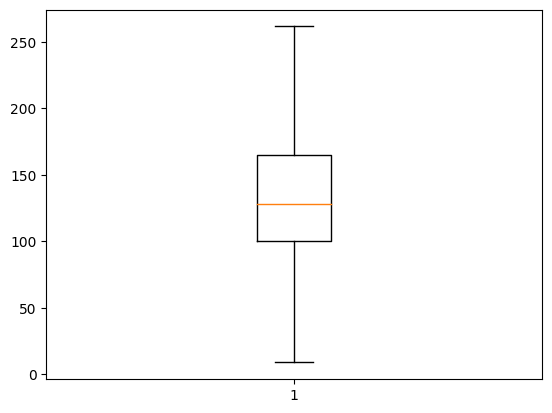

In [246]:
# boxplot Graph for LoanAmount
plt.boxplot(loan_dataset.LoanAmount)
plt.show()

## **Encoding**

In [247]:
# Gender Encoding
loan_dataset.Education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [248]:
educationDist = {'Graduate' : 1 , 'Not Graduate' : 0}
loan_dataset.Education = loan_dataset.Education.map(educationDist)

In [249]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,1,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,1,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,1,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,0,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,1,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [250]:
booleanDist = { 'Male' : 1, 'Female': 0}
#Gender
loan_dataset.Gender = loan_dataset.Gender.map(booleanDist)

In [251]:
booleanDist = { 'Yes' : 1, 'No': 0}
#Married
loan_dataset.Married = loan_dataset.Married.map(booleanDist)

In [252]:
booleanDist = { 'Y' : 1, 'N': 0}
#Loan_Status
loan_dataset.Loan_Status = loan_dataset.Loan_Status.map(booleanDist)

In [253]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,1,1,1,1,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,1,1,0,1,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,1,1,0,0,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,1,0,0,1,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [254]:
loan_dataset.Self_Employed.unique()

array(['No', 'Yes'], dtype=object)

In [255]:
booleanDist = { 'Yes' : 1, 'No': 0}
#Self_Employed
loan_dataset.Self_Employed = loan_dataset.Self_Employed.map(booleanDist)

In [256]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,1


In [257]:
# One hot Encoding for Property_Area
loan_dataset.Property_Area.unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [258]:
loan_dataset_encoded = pd.get_dummies(loan_dataset, columns=['Property_Area'], dtype= int)
loan_dataset_encoded

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,1,0,0,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,1,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,0,0,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,0,0,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,1,1,0,0
610,LP002979,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,1,1,0,0
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,1,0,0,1
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,1,0,0,1


## **Scaling**

In [259]:
# No need to implement feature engineering
# Direct MIN MAX Scaling
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()

In [260]:
loan_dataset_encoded.dtypes

Loan_ID                     object
Gender                       int64
Married                      int64
Dependents                   int64
Education                    int64
Self_Employed                int64
ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Loan_Status                  int64
Property_Area_Rural          int64
Property_Area_Semiurban      int64
Property_Area_Urban          int64
dtype: object

In [261]:
# Drop Loan_Id column
# Not required for data preprocessing

loan_dataset_encoded = loan_dataset_encoded.drop('Loan_ID', axis = 1)

In [262]:
loan_dataset_encoded.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [263]:
loan_dataset_encoded.loc[: , ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status']] = min_max.fit_transform(loan_dataset_encoded[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status']])

In [264]:
loan_dataset_encoded.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0.000000,1,0,0.070489,0.000000,0.471287,0.74359,1.0,1,0,0,1
1,1,1,0.333333,1,0,0.054830,0.036192,0.471287,0.74359,1.0,0,1,0,0
2,1,1,0.000000,1,1,0.035250,0.000000,0.225743,0.74359,1.0,1,0,0,1
3,1,1,0.000000,0,0,0.030093,0.056592,0.439604,0.74359,1.0,1,0,0,1
4,1,0,0.000000,1,0,0.072356,0.000000,0.522772,0.74359,1.0,1,0,0,1


## OUTPUT **DATA**

In [265]:
# Variable Name   : loan_dataset_encoded
# Shape           : 614 rows × 14 columns
# No. of columns  :  14
loan_dataset_encoded

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0.000000,1,0,0.070489,0.000000,0.471287,0.743590,1.0,1,0,0,1
1,1,1,0.333333,1,0,0.054830,0.036192,0.471287,0.743590,1.0,0,1,0,0
2,1,1,0.000000,1,1,0.035250,0.000000,0.225743,0.743590,1.0,1,0,0,1
3,1,1,0.000000,0,0,0.030093,0.056592,0.439604,0.743590,1.0,1,0,0,1
4,1,0,0.000000,1,0,0.072356,0.000000,0.522772,0.743590,1.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0.000000,1,0,0.034014,0.000000,0.245545,0.743590,1.0,1,1,0,0
610,1,1,1.000000,1,0,0.048930,0.000000,0.122772,0.358974,1.0,1,1,0,0
611,1,1,0.333333,1,0,0.097984,0.005760,0.966337,0.743590,1.0,1,0,0,1
612,1,1,0.666667,1,0,0.091936,0.000000,0.704950,0.743590,1.0,1,0,0,1
